In [34]:
from datetime import datetime as dt
import os 
import pandas as pd
import numpy as np

# Duomenų šaltinis https://data.gov.lt/datasets/1828/#resources
data_files=['2021_I_kiti','2021_I_ŠPAM','2021_I_VKK','2021_II_kiti','2021_II_ŠPAM','2021_II_VKK']
data_dir="../../../duomenys/data_gov_lt/elektra" # atsisiųsti failai
data_dir_git="./git_copy/el_vartotojai_2021_stats" # konvertuoti csv saugomi čia pat
data_file_ext="csv_" # "*.csv_" sinchronizuojama GIT

print('Pasiruošta',dt.now().replace(microsecond=0))
print(os.getcwd())

file_list = os.listdir(data_dir_git)
# Print elements containing 'utf', one per line
for file in file_list:
    if 'utf' in file:
        print(file)

# c:\Users\Eridas\Documents\vilniuscoding2024\git\DataScienceNotebooks\Studentai\MykolasOK
# /home/administratorius/git/python_kursai/DataScienceNotebooks/Studentai/MykolasOK

Pasiruošta 2025-01-27 21:42:18
c:\Users\Eridas\Documents\vilniuscoding2024\git\DataScienceNotebooks\Studentai\MykolasOK
2021_II_kiti_utf-8.csv_
2021_II_VKK_utf-8.csv_
2021_II_ŠPAM_utf-8.csv_
2021_I_kiti_utf-8.csv_
2021_I_VKK_utf-8.csv_
2021_I_ŠPAM_utf-8.csv_


In [35]:
print("Duomenys iš failų įkeliami į 'df_dict={}'. ",dt.now().replace(microsecond=0))

df_dict={}

for file in data_files:
    print(f'{data_dir_git}/{file}_utf-8_m.{data_file_ext}',end=' ')
    df = pd.read_csv(f'{data_dir_git}/{file}_utf-8.{data_file_ext}',sep=',',low_memory=False)
    # ,sep=r'[;,]',engine='python'
    print(f'>>> {df.shape} (eil. x stulp.)')
    
    df_dict[file]=df

# print('+'*50)

Duomenys iš failų įkeliami į 'df_dict={}'.  2025-01-27 21:42:22
./git_copy/el_vartotojai_2021_stats/2021_I_kiti_utf-8_m.csv_ >>> (1048575, 11) (eil. x stulp.)
./git_copy/el_vartotojai_2021_stats/2021_I_ŠPAM_utf-8_m.csv_ >>> (271444, 11) (eil. x stulp.)
./git_copy/el_vartotojai_2021_stats/2021_I_VKK_utf-8_m.csv_ >>> (1015563, 11) (eil. x stulp.)
./git_copy/el_vartotojai_2021_stats/2021_II_kiti_utf-8_m.csv_ >>> (1048575, 11) (eil. x stulp.)
./git_copy/el_vartotojai_2021_stats/2021_II_ŠPAM_utf-8_m.csv_ >>> (272313, 11) (eil. x stulp.)
./git_copy/el_vartotojai_2021_stats/2021_II_VKK_utf-8_m.csv_ >>> (1024658, 11) (eil. x stulp.)


In [36]:
print(list(df_dict.keys()))
print(list(df_dict['2021_I_kiti'].keys()))

['2021_I_kiti', '2021_I_ŠPAM', '2021_I_VKK', '2021_II_kiti', '2021_II_ŠPAM', '2021_II_VKK']
['REGIONAS', 'SUT_TIPAS', 'SUT_GAM', 'GV_TIPAS', 'GEN_GALIA', 'KWH01', 'KWH02', 'KWH03', 'KWH04', 'KWH05', 'KWH06']


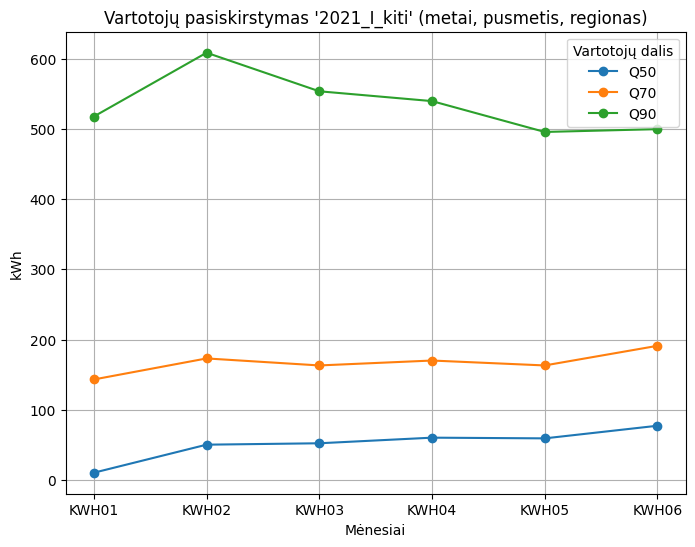

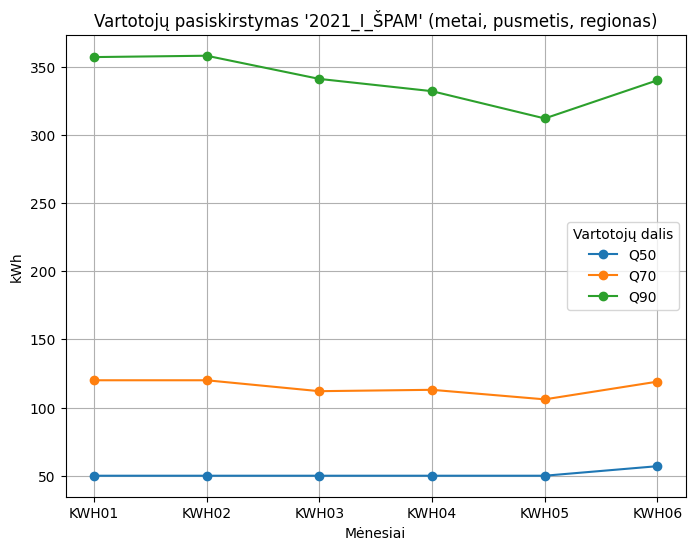

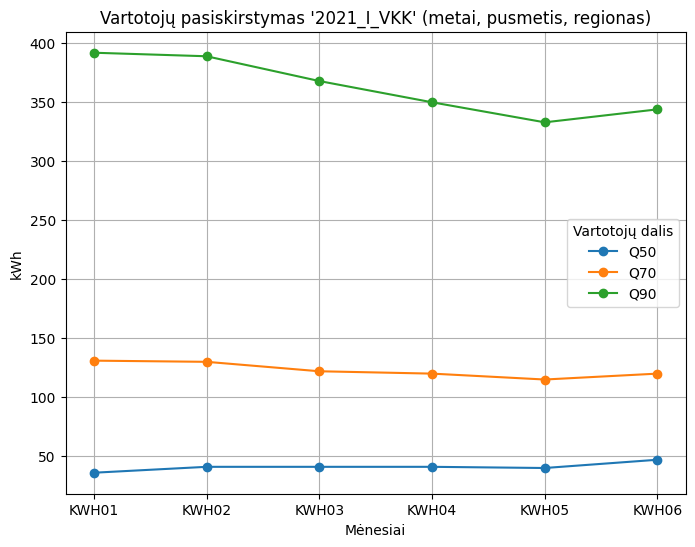

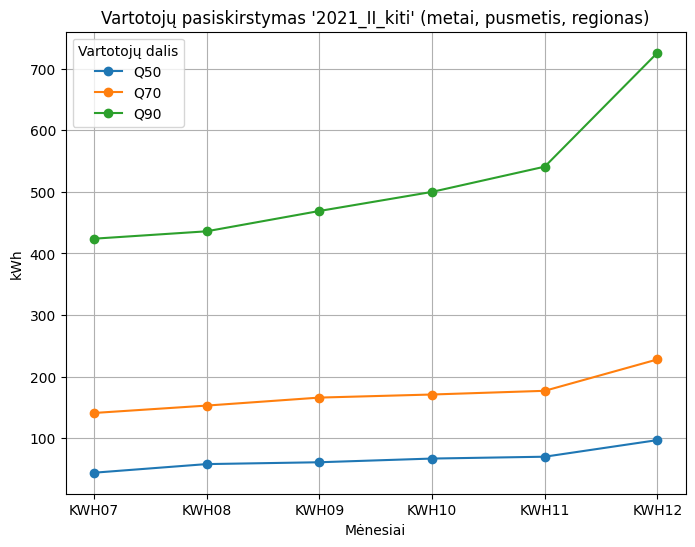

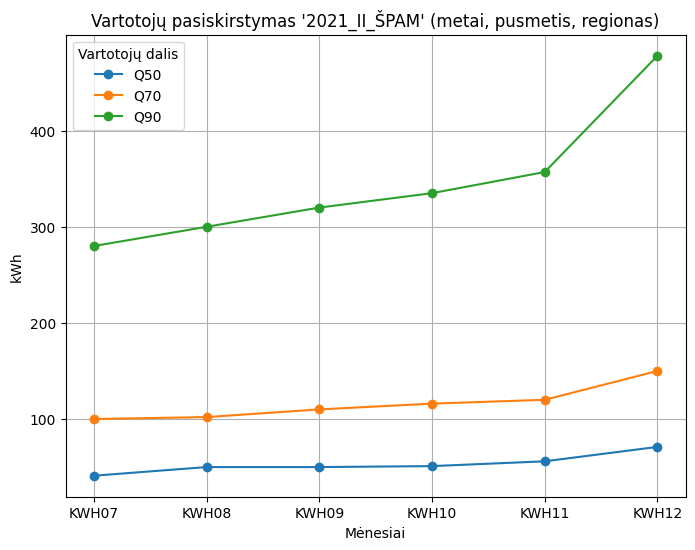

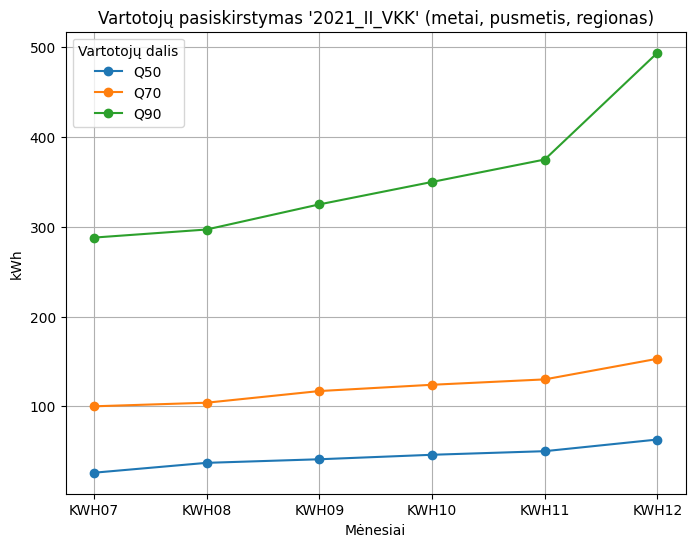

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

for name, df in df_dict.items():
    # Atrenkame tik laukus, kurie prasideda "KWH"
    kwh_fields = [col for col in df.columns if col.startswith('KWH')]
    
    # Sukuriame duomenų rinkinį tik su KWH laukais
    if kwh_fields:  # Jei yra tokių laukų
        kwh_data = df[kwh_fields]
        
        # Nustatome slenksčius
        quantiles = kwh_data.quantile([0.5, 0.7, 0.9])
        
        # Nupiešiame grafiką
        plt.figure(figsize=(8, 6))
        for quantile in quantiles.index:
            plt.plot(kwh_fields, quantiles.loc[quantile], label=f'Q{int(quantile * 100)}', marker='o')
        
        # Pritaikome grafikui pavadinimą ir ašis
        plt.title(f"Vartotojų pasiskirstymas '{name}' (metai, pusmetis, regionas)")
        plt.xlabel("Mėnesiai")
        plt.ylabel("kWh")
        plt.legend(title="Vartotojų dalis")
        plt.grid(True)
        
        # Parodome grafiką
        plt.show()

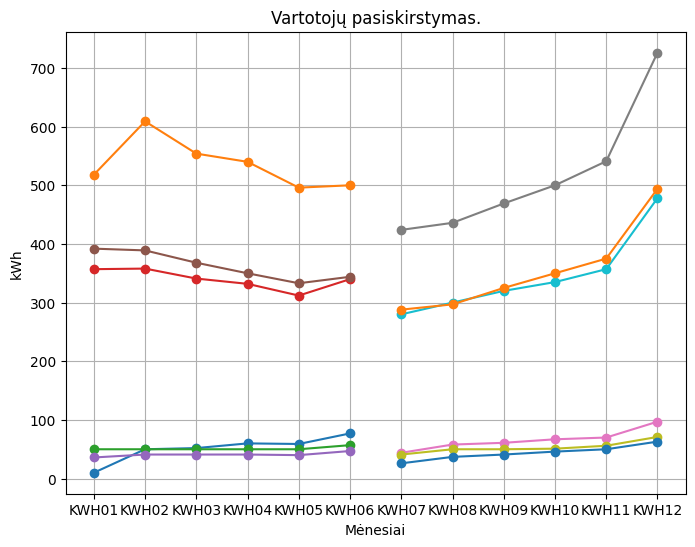

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Nupiešiame grafiką
plt.figure(figsize=(8, 6))

for name, df in df_dict.items():
    # Atrenkame tik laukus, kurie prasideda "KWH"
    kwh_fields = [col for col in df.columns if col.startswith('KWH')]
    
    # Sukuriame duomenų rinkinį tik su KWH laukais
    if kwh_fields:  # Jei yra tokių laukų
        kwh_data = df[kwh_fields]
        
        # Nustatome slenksčius
        quantiles = kwh_data.quantile([0.5, 0.9])
        
        for quantile in quantiles.index:
            plt.plot(kwh_fields,quantiles.loc[quantile],marker='o') # , label=f'{name} Q{int(quantile * 100)}'
        
        # Pritaikome grafikui pavadinimą ir ašis
        plt.title(f"Vartotojų pasiskirstymas.")
        plt.xlabel("Mėnesiai")
        plt.ylabel("kWh")
        # plt.legend(title="Vartotojų dalis")
        plt.grid(True)
        
# Parodome grafiką
plt.show()

In [39]:
import pandas as pd

# Iteruojame per kiekvieną DataFrame žodyne
for name, df in df_dict.items():
    # Filtruojame stulpelius, kurių pavadinimai prasideda „KWH“
    kwh_columns = [col for col in df.columns if col.startswith('KW')]
    if kwh_columns:  # Tik jei yra KWH stulpelių
        # Apskaičiuojame eilučių vidurkius KW stulpeliuose
        df['KWH_mean'] = df[kwh_columns].mean(axis=1)

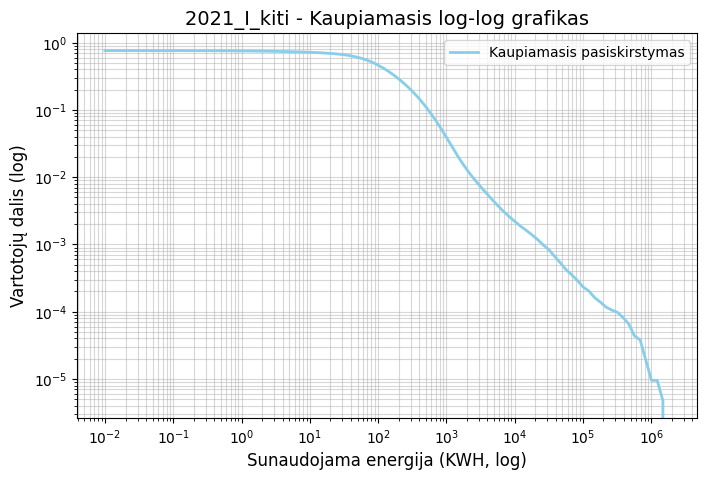

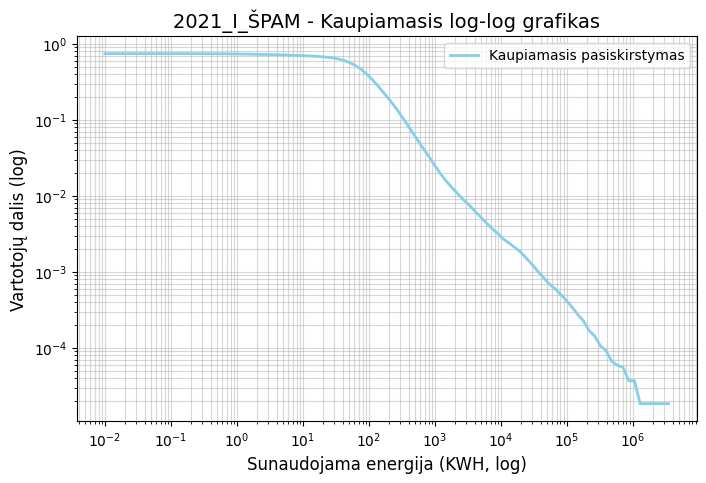

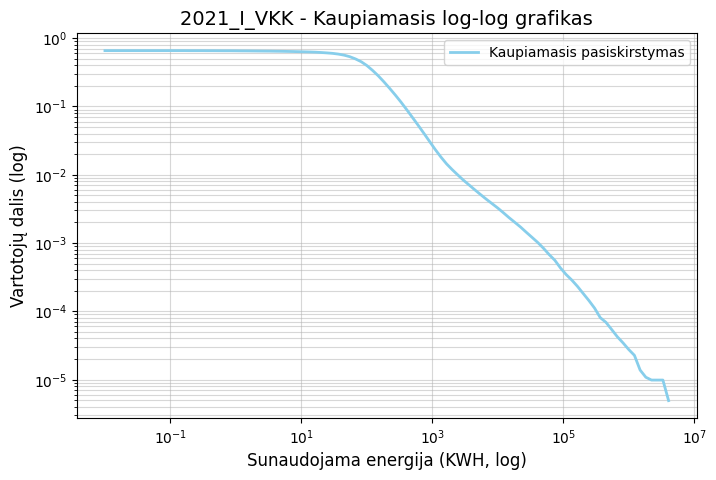

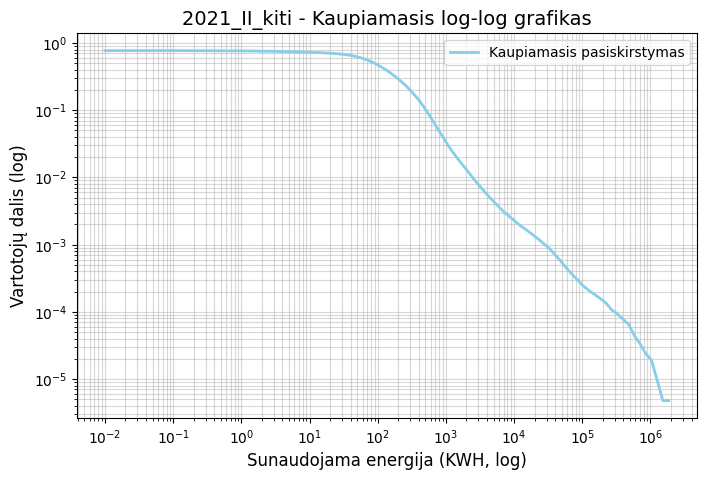

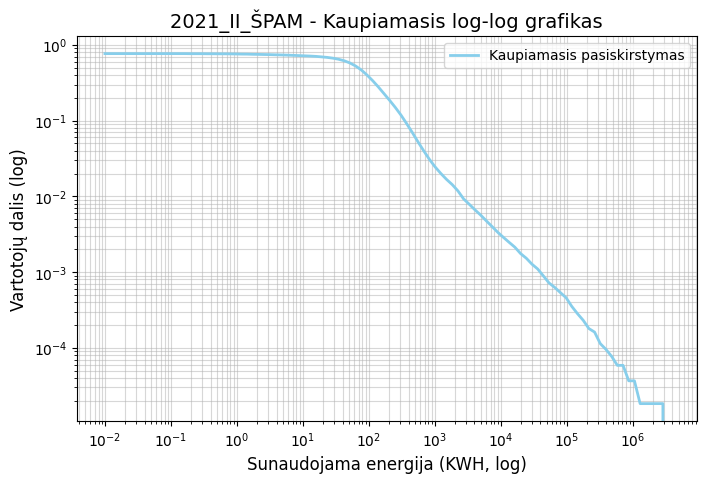

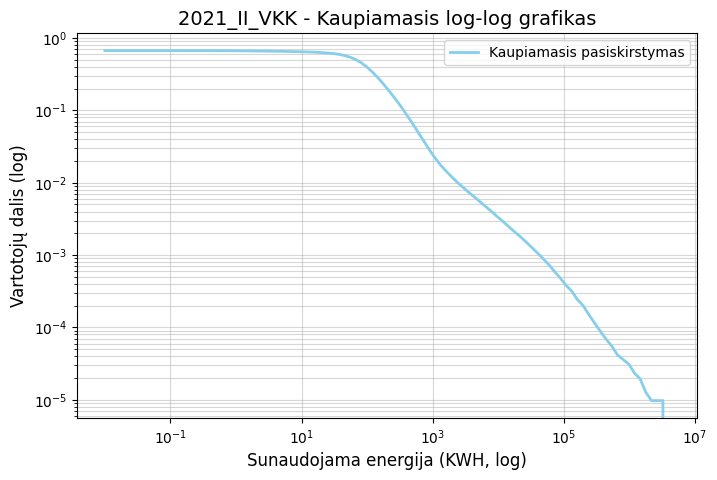

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Iteruojame per kiekvieną DataFrame žodyne
for name, df in df_dict.items():
    if 'KWH_mean' in df.columns:  # Tikriname, ar 'KWH_mean' egzistuoja
        max_kwh_mean = df['KWH_mean'].max()  # Maksimali reikšmė konkrečiame DataFrame
        x_values = np.logspace(-2, np.log10(max_kwh_mean), 100)  # Logaritminis X intervalas
        total_count = len(df)  # Bendras eilučių skaičius
        y_values = [sum(df['KWH_mean'] > x) / total_count for x in x_values]  # Normalizuota dalis

        # Braižome grafiką
        plt.figure(figsize=(8, 5))
        plt.plot(x_values, y_values, label="Kaupiamasis pasiskirstymas", color='skyblue', lw=2)
        plt.title(f"{name} - Kaupiamasis log-log grafikas", fontsize=14)
        plt.xlabel("Sunaudojama energija (KWH, log)", fontsize=12)
        plt.ylabel("Vartotojų dalis (log)", fontsize=12)
        plt.xscale('log')  # Logaritminė X skalė
        plt.yscale('log')  # Logaritminė Y skalė
        plt.grid(alpha=0.5, which='both')  # Rodyti log grotelės
        plt.legend()
        plt.show()  # Parodome grafiką

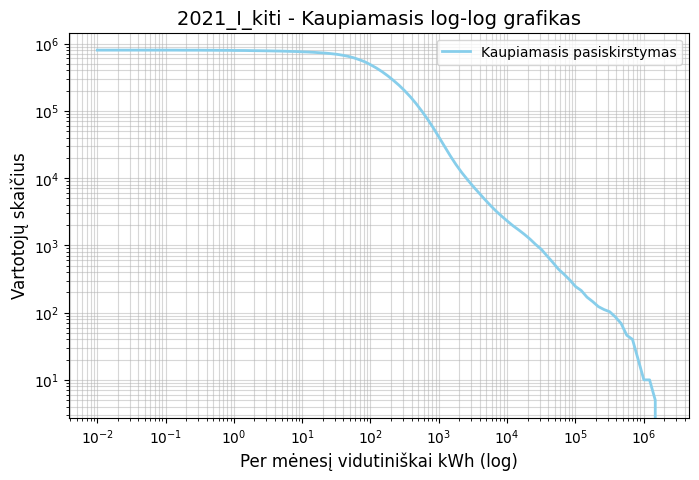

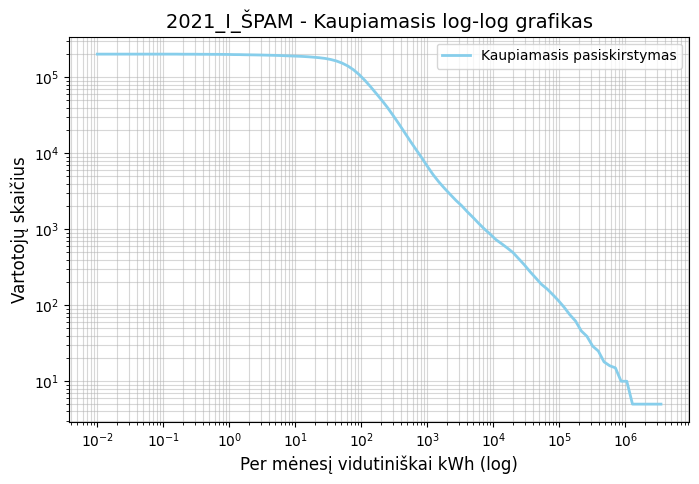

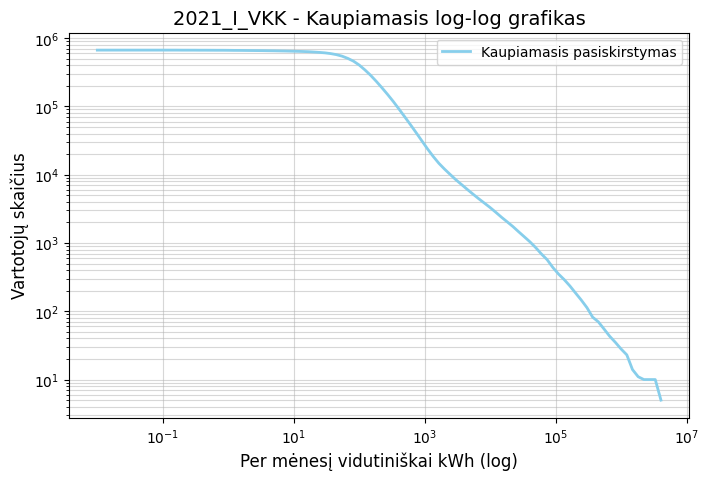

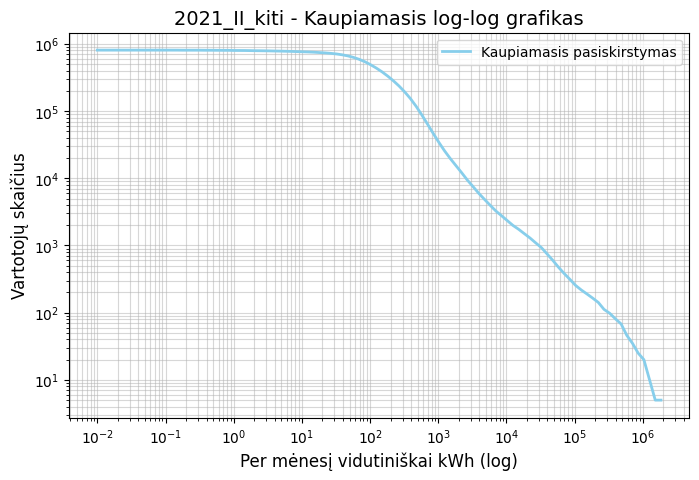

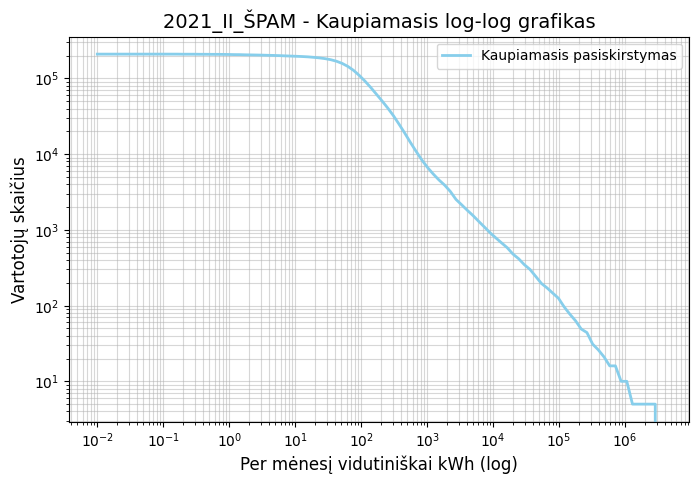

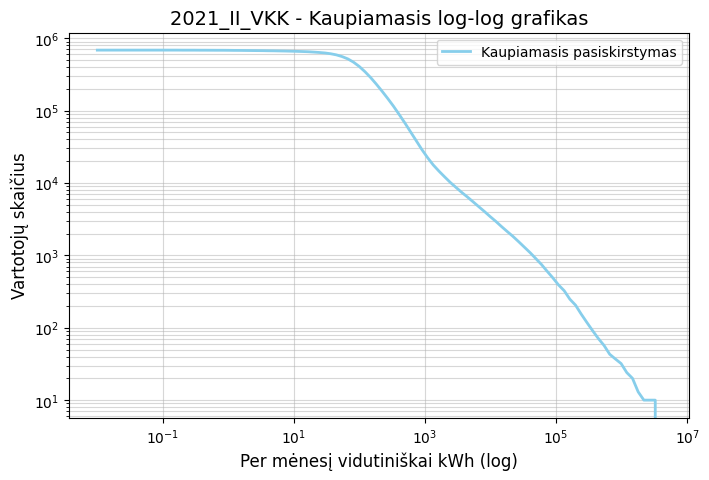

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Iteruojame per kiekvieną DataFrame žodyne
for name, df in df_dict.items():
    if 'KWH_mean' in df.columns:  # Tikriname, ar 'KWH_mean' egzistuoja
        max_kwh_mean = df['KWH_mean'].max()  # Maksimali reikšmė konkrečiame DataFrame
        x_values = np.logspace(-2, np.log10(max_kwh_mean), 100)  # Logaritminis X intervalas
        total_count = len(df)  # Bendras eilučių skaičius
        y_values = [sum(df['KWH_mean'] > x) for x in x_values]  # Absoliutus vartotojų skaičius

        # Braižome grafiką
        plt.figure(figsize=(8, 5))
        plt.plot(x_values, y_values, label="Kaupiamasis pasiskirstymas", color='skyblue', lw=2)
        plt.title(f"{name} - Kaupiamasis log-log grafikas", fontsize=14)
        plt.xlabel("Per mėnesį vidutiniškai kWh (log)", fontsize=12)
        plt.ylabel("Vartotojų skaičius", fontsize=12)
        plt.xscale('log')  # Logaritminė X skalė
        plt.yscale('log')  # Logaritminė Y skalė
        plt.grid(alpha=0.5, which='both')  # Rodyti log grotelės
        plt.legend()
        plt.show()  # Parodome grafiką


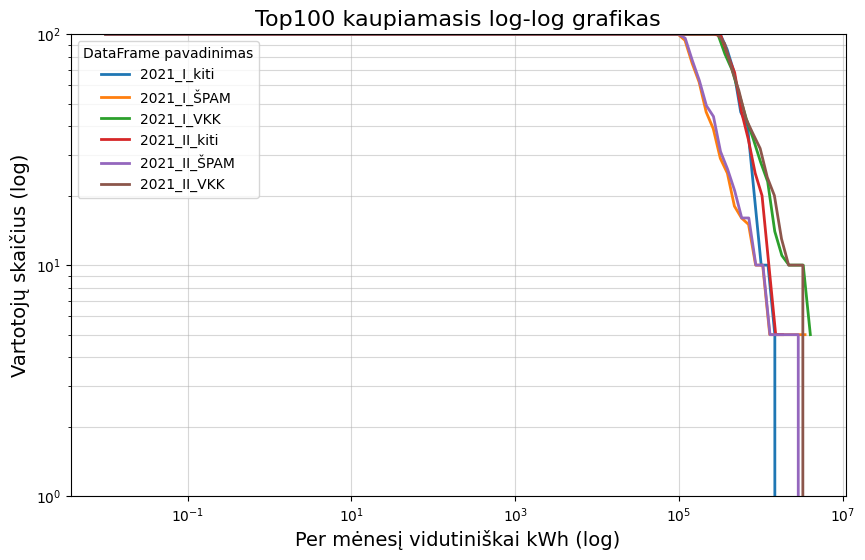

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Apsiriboja tik pirmuosius 100 vartotojų (jei reikia)
top_limit = 100

plt.figure(figsize=(10, 6))  # Sukuriame bendrą figūrą

# Iteruojame per kiekvieną DataFrame žodyne
for name, df in df_dict.items():
    if 'KWH_mean' in df.columns:  # Tikriname, ar 'KWH_mean' egzistuoja
        # Surikiuojame pagal 'KWH_mean' ir paimame tik pirmuosius 100
        sorted_df = df.sort_values(by='KWH_mean', ascending=False).head(top_limit)
        max_kwh_mean = sorted_df['KWH_mean'].max()  # Maksimali reikšmė tarp Top 100
        x_values = np.logspace(-2, np.log10(max_kwh_mean), 100)  # Logaritminis X intervalas
        total_count = len(sorted_df)  # Bendras eilučių skaičius
        y_values = [sum(sorted_df['KWH_mean'] > x) for x in x_values]  # Absoliutus vartotojų skaičius

        # Braižome grafiką
        plt.plot(x_values, y_values, label=name, lw=2)

# Grafiko nustatymai
plt.title("Top100 kaupiamasis log-log grafikas", fontsize=16)
plt.xlabel("Per mėnesį vidutiniškai kWh (log)", fontsize=14)
plt.ylabel("Vartotojų skaičius (log)", fontsize=14)
plt.xscale('log')  # Logaritminė X skalė
plt.yscale('log')  # Logaritminė Y skalė
plt.ylim(1, top_limit)  # Y ašis apribota nuo 1 iki 100 vartotojų
plt.grid(alpha=0.5, which='both')  # Rodyti log grotelės
plt.legend(title="Duomenų rinkinio pavadinimas")
plt.show()  # Parodome grafiką


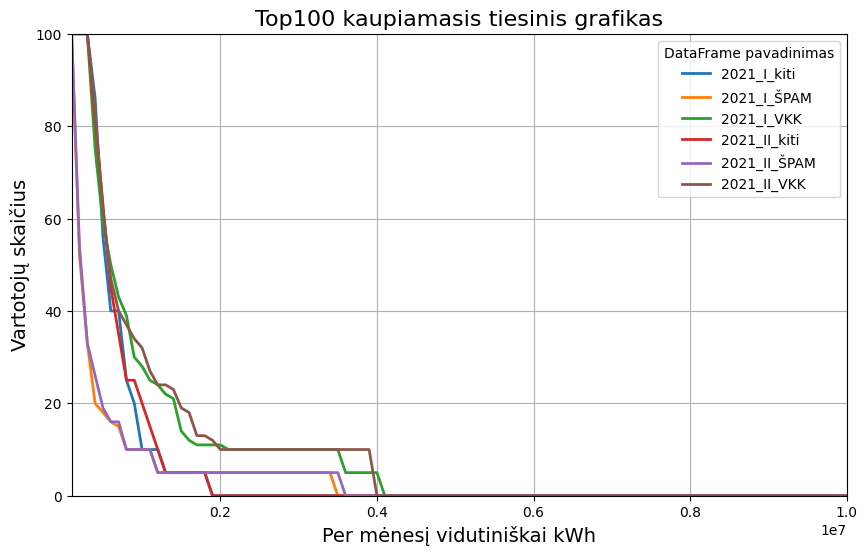

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Apsiriboja tik pirmuosius 100 vartotojų (jei reikia)
top_limit = 100

plt.figure(figsize=(10, 6))  # Sukuriame bendrą figūrą

# Iteruojame per kiekvieną DataFrame žodyne
for name, df in df_dict.items():
    if 'KWH_mean' in df.columns:  # Tikriname, ar 'KWH_mean' egzistuoja
        # Surikiuojame pagal 'KWH_mean' ir paimame tik pirmuosius 100
        sorted_df = df.sort_values(by='KWH_mean', ascending=False).head(top_limit)
        max_kwh_mean = sorted_df['KWH_mean'].max()  # Maksimali reikšmė tarp Top 100
        x_values = np.linspace(1e5, 1e7, 100)  # Tiesinis X intervalas nuo 1e5 iki 1e7
        total_count = len(sorted_df)  # Bendras eilučių skaičius
        y_values = [sum(sorted_df['KWH_mean'] > x) for x in x_values]  # Absoliutus vartotojų skaičius

        # Braižome grafiką
        plt.plot(x_values, y_values, label=name, lw=2)

# Grafiko nustatymai
plt.title("Top100 kaupiamasis tiesinis grafikas", fontsize=16)
plt.xlabel("Per mėnesį vidutiniškai kWh", fontsize=14)
plt.ylabel("Vartotojų skaičius", fontsize=14)
plt.xlim(1e5, 1e7)  # X ašis nuo 10^5 iki 10^7
plt.ylim(0, top_limit)  # Y ašis nuo 0 iki 100 vartotojų
plt.grid(True)
plt.legend(title="Duomenų failas")
plt.show()  # Parodome grafiką

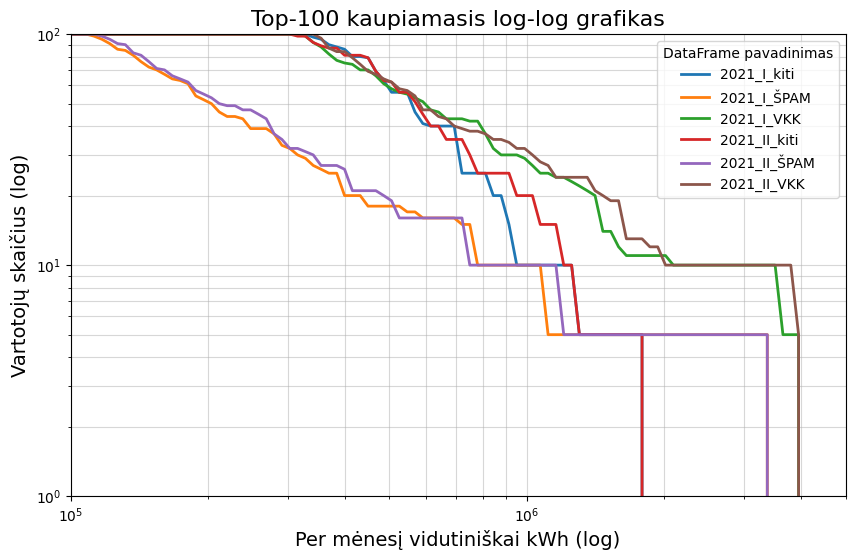

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Apsiriboja tik pirmuosius 100 vartotojų (jei reikia)
top_limit = 100

plt.figure(figsize=(10, 6))  # Sukuriame bendrą figūrą

# Iteruojame per kiekvieną DataFrame žodyne
for name, df in df_dict.items():
    if 'KWH_mean' in df.columns:  # Tikriname, ar 'KWH_mean' egzistuoja
        # Surikiuojame pagal 'KWH_mean' ir paimame tik pirmuosius 100
        sorted_df = df.sort_values(by='KWH_mean', ascending=False).head(top_limit)
        max_kwh_mean = sorted_df['KWH_mean'].max()  # Maksimali reikšmė tarp Top 100
        x_values = np.logspace(np.log10(1e5), np.log10(5e6), 100)  # Logaritminis X intervalas nuo 1e5 iki 5e6
        total_count = len(sorted_df)  # Bendras eilučių skaičius
        y_values = [sum(sorted_df['KWH_mean'] > x) for x in x_values]  # Absoliutus vartotojų skaičius

        # Braižome grafiką
        plt.plot(x_values, y_values, label=name, lw=2)

# Grafiko nustatymai
plt.title("Top-100 kaupiamasis log-log grafikas", fontsize=16)
plt.xlabel("Per mėnesį vidutiniškai kWh (log)", fontsize=14)
plt.ylabel("Vartotojų skaičius (log)", fontsize=14)
plt.xscale('log')  # Logaritminė X skalė
plt.yscale('log')  # Logaritminė Y skalė
plt.xlim(1e5, 5e6)  # X ašis nuo 10^5 iki 5*10^6
plt.ylim(1, top_limit)  # Y ašis nuo 1 iki 100 vartotojų
plt.grid(True, which='both', alpha=0.5)  # Rodyti log grotelės
plt.legend(title="Duomenų failas")
plt.show()  # Parodome grafiką

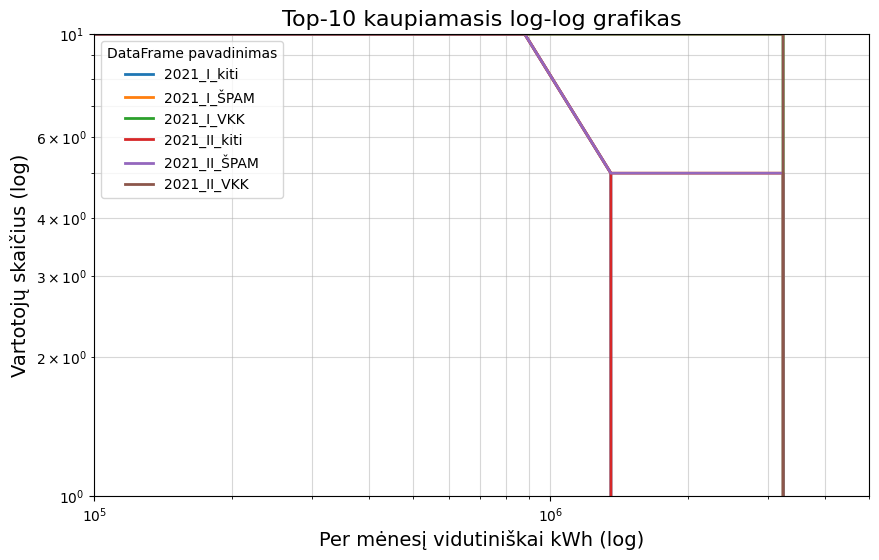

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Apsiriboja tik pirmuosius 10 vartotojų (jei reikia)
top_limit = 10

plt.figure(figsize=(10, 6))  # Sukuriame bendrą figūrą

# Iteruojame per kiekvieną DataFrame žodyne
for name, df in df_dict.items():
    if 'KWH_mean' in df.columns:  # Tikriname, ar 'KWH_mean' egzistuoja
        # Surikiuojame pagal 'KWH_mean' ir paimame tik pirmuosius 10
        sorted_df = df.sort_values(by='KWH_mean', ascending=False).head(top_limit)
        max_kwh_mean = sorted_df['KWH_mean'].max()  # Maksimali reikšmė tarp Top 10
        x_values = np.logspace(np.log10(1e5), np.log10(5e6), 10)  # Logaritminis X intervalas nuo 1e5 iki 5e6
        total_count = len(sorted_df)  # Bendras eilučių skaičius
        y_values = [sum(sorted_df['KWH_mean'] > x) for x in x_values]  # Absoliutus vartotojų skaičius

        # Braižome grafiką
        plt.plot(x_values, y_values, label=name, lw=2)

# Grafiko nustatymai
plt.title("Top-10 kaupiamasis log-log grafikas", fontsize=16)
plt.xlabel("Per mėnesį vidutiniškai kWh (log)", fontsize=14)
plt.ylabel("Vartotojų skaičius (log)", fontsize=14)
plt.xscale('log')  # Logaritminė X skalė
plt.yscale('log')  # Logaritminė Y skalė
plt.xlim(1e5, 5e6)  # X ašis nuo 10^5 iki 5*10^6
plt.ylim(1,top_limit)  # Y ašis nuo 1 iki 10 vartotojų
plt.grid(True, which='both', alpha=0.5)  # Rodyti log grotelės
plt.legend(title="DataFrame pavadinimas")
plt.show()  # Parodome grafiką